## ETTAnalyzer 
Raman Khurana  (29 April 2021)
 * columnar analysis code using uproot and awkward arrays for ECAL Trigger studies 
 * some syntax motivation from http://home.thep.lu.se/~bierlich/home/

In [1]:
##-- Imports 
import uproot ##-- If uproot isn't installed, on lxplus run: pip install --user uproot 
import numpy as np 
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib import pyplot as plt 



### Variable to be plotted: twrEmul3ADC

In [2]:
#variable = "twrADC"
variable = "twrEmul3ADC"



In [3]:
#!ls -lhtr inputL1ETM/

In [17]:
#from matplotlib import gridspec

def PlotOverlayWithRatio(data_, labels, pdfname,bins=np.array([0,8,16,24,32,40,48,56,64,72,80,88,256]), cuml=0):
    plt1_ = data_[0]
    plt2_ = data_[1]

    
    plt.figure(figsize=(6, 6))

    #spec = gridspec.GridSpec(ncols=1, nrows=2,
    #                         height_ratios=[2, 1])

    fig, axs = plt.subplots( 2, gridspec_kw={'height_ratios': [2.5, 1]} )

    ax1 = axs[0]
    ax2 = axs[1]


    #bins=np.array([0,8,16,24,32,40,48,56,64,72,80,88,256])
    bin_centers = np.array([ (((float(bins[i+1]) - float(bins[i])) / 2.) + float(bins[i])) for i in range(0, len(bins)-1)])

    
    ns1, bins1, patches1 = ax1.hist(plt1_,bins=bins,histtype = 'step', label=labels[0],cumulative=cuml)
    ns2, bins2, patches2 = ax1.hist(plt2_,bins=bins,histtype = 'step', label=labels[1],cumulative=cuml)
    
    ax1.set_xticklabels([])
    ax1.set_ylabel('')
    ax1.set_xlabel(r'')
    ax1.set_yscale('log')
    ax1.legend(fontsize=20,frameon=False)
    ax1.set_title("CMS Internal",fontsize=20,loc='left')
    #ax1.set_title('Run 2 data',fontsize=15,loc="right")
    ax1.set_title('Run 3 simulation',fontsize=15,loc="right")


    ax2.set_xlim([bins[0],bins[-1]])
    #ax2.set_ylim([0.8,1.2])

    ax2.plot(bin_centers,ns2/ns1,"o") 
    ax2.set_xlabel(r'Emulated Tower $E_{T}$ at BX=0  (in ADC)',fontsize=20)
    ax2.set_ylabel('ratio',fontsize=20)


    plt.savefig("plots/L1ETM/"+pdfname)


In [5]:
def Flatten(thisdata_):
    return([pd.Series(idata.flatten()) for idata in thisdata_])

In [6]:
def RemoveZero(thisdata_):
    return ( [idata[idata>0]for idata in thisdata_] )

In [7]:
def ReadVariable(files ):
    data_=[]
    for ifile in files:
        f1      = uproot.open(ifile)
        arry_ = f1['tuplizer']['ETTAnalyzerTree'][variable].array()
        data_.append(arry_)
    return data_ 

    



<Figure size 432x432 with 0 Axes>

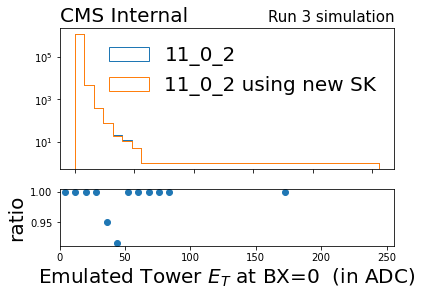

In [8]:
files_ = ["inputL1ETM/ecal_l1t_team_tuples_11_0_2.root","inputL1ETM/ecal_l1t_team_tuples_11_0_2_with_11_2_1Tag.root"]
labels_= ["11_0_2","11_0_2 using new SK"]
data_to_plot = RemoveZero ( Flatten ( ReadVariable(files_) ) )
PlotOverlayWithRatio(data_to_plot, labels_, "Emul_BX0_11_0_2_vs_11_0_2_using_new_SK.pdf")

<Figure size 432x432 with 0 Axes>

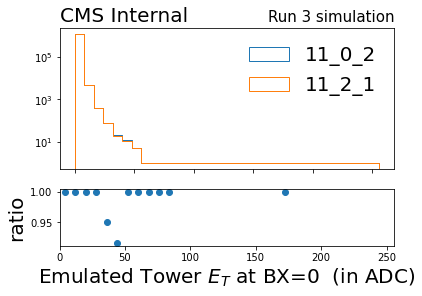

In [9]:
files_ = ["inputL1ETM/ecal_l1t_team_tuples_11_0_2.root", "inputL1ETM/ecal_l1t_team_tuples_11_2_1.root"]
labels_= ["11_0_2", "11_2_1"]
data_to_plot = RemoveZero ( Flatten ( ReadVariable(files_) ) )
PlotOverlayWithRatio(data_to_plot, labels_,"Emul_BX0_11_0_2_vs_11_2_1.pdf")

<Figure size 432x432 with 0 Axes>

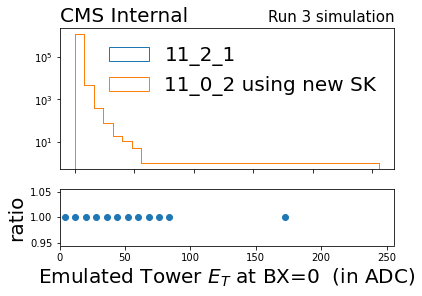

In [10]:
files_ = ["inputL1ETM/ecal_l1t_team_tuples_11_2_1.root","inputL1ETM/ecal_l1t_team_tuples_11_0_2_with_11_2_1Tag.root"]
labels_= ["11_2_1","11_0_2 using new SK"]
data_to_plot = RemoveZero ( Flatten ( ReadVariable(files_) ) )
PlotOverlayWithRatio(data_to_plot, labels_,"Emul_BX0_11_2_1_vs_11_0_2_using_new_SK.pdf") 

--------------------

## Sum $E_{T}$ and Cumulative Sum $E_{T}$ plots
--------------------


In [29]:
def ReadVariableEta(files ):
    data_=[]
    for ifile in files:
        f1      = uproot.open(ifile)
        tp = f1['tuplizer']['ETTAnalyzerTree'][variable].array()
        eta = np.abs(f1['tuplizer']['ETTAnalyzerTree']["ieta"].array())
        tp_barrel = tp [eta<=17].sum()
        tp_endcap = tp [eta>17].sum()


        data_.append((tp,tp.sum(),tp_barrel, tp_endcap))
    return data_ 

In [30]:
files_ = ["inputL1ETM/ecal_l1t_team_tuples_11_0_2.root", "inputL1ETM/ecal_l1t_team_tuples_11_2_1.root"]
labels_= ["11_0_2", "11_2_1"]

data_to_plot =   ReadVariableEta(files_) 
tp1_,tp1,tp_b1,tp_e1 = data_to_plot[0]
tp2_,tp2,tp_b2,tp_e2 = data_to_plot[1]

<Figure size 432x432 with 0 Axes>

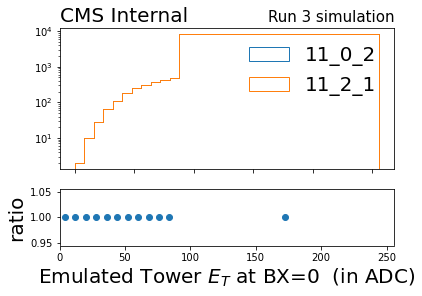

In [31]:
PlotOverlayWithRatio([tp1,tp2], labels_,"EmulSum_ECAL_BX0_11_0_2_vs_11_2_1.pdf")

<Figure size 432x432 with 0 Axes>

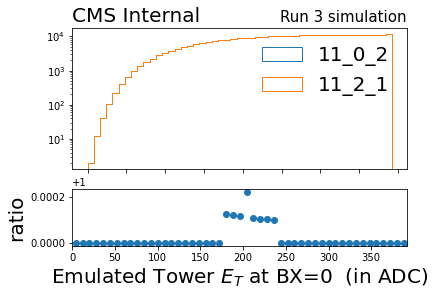

In [32]:
PlotOverlayWithRatio([tp1,tp2], labels_,"Cumm_EmulSum_ECAL_BX0_11_0_2_vs_11_2_1.pdf", 
                     bins=np.arange(0,400,8),
                     cuml=1)

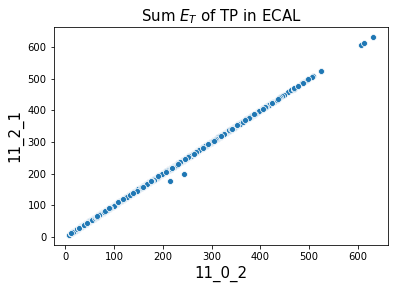

In [33]:
import seaborn as sns 
ax = sns.scatterplot(tp1,tp2 )
ax.set_xlabel("11_0_2",fontsize=15)
ax.set_ylabel("11_2_1",fontsize=15)
ax.set_title("Sum $E_T$ of TP in ECAL",fontsize=15)
plt.savefig("plots/L1ETM/SumEt_TP_ECAL.pdf")

<Figure size 432x432 with 0 Axes>

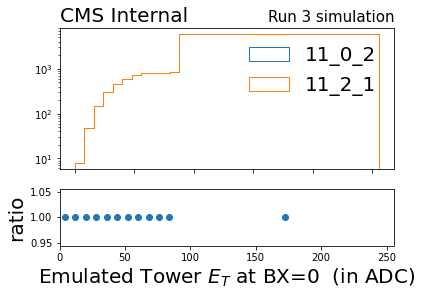

In [34]:
PlotOverlayWithRatio([tp_b1,tp_b2], labels_,"EmulSum_EB_BX0_11_0_2_vs_11_2_1.pdf")

<Figure size 432x432 with 0 Axes>

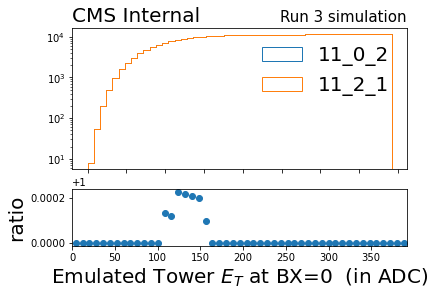

In [35]:
PlotOverlayWithRatio([tp_b1,tp_b2], labels_,"Cumm_EmulSum_EB_BX0_11_0_2_vs_11_2_1.pdf", 
                     bins=np.arange(0,400,8),
                     cuml=1)

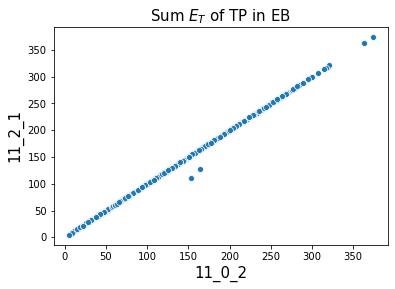

In [36]:
import seaborn as sns 
ax = sns.scatterplot(tp_b1,tp_b2 )
ax.set_xlabel("11_0_2",fontsize=15)
ax.set_ylabel("11_2_1",fontsize=15)
ax.set_title("Sum $E_T$ of TP in EB",fontsize=15)
plt.savefig("plots/L1ETM/SumEt_TP_EB.pdf")

<Figure size 432x432 with 0 Axes>

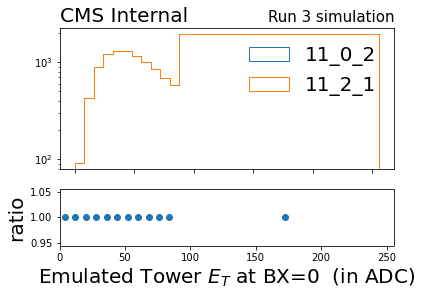

In [37]:
PlotOverlayWithRatio([tp_e1,tp_e2], labels_,"EmulSum_BX0_EE_11_0_2_vs_11_2_1.pdf")

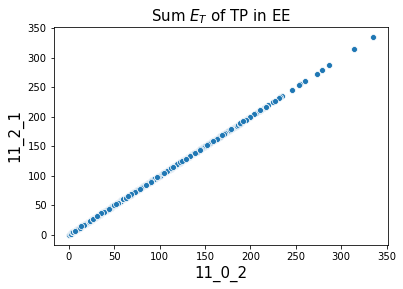

In [38]:
import seaborn as sns 
ax = sns.scatterplot(tp_e1,tp_e2 )
ax.set_xlabel("11_0_2",fontsize=15)
ax.set_ylabel("11_2_1",fontsize=15)
ax.set_title("Sum $E_T$ of TP in EE",fontsize=15)
plt.savefig("plots/L1ETM/SumEt_TP_EE.pdf")

<Figure size 432x432 with 0 Axes>

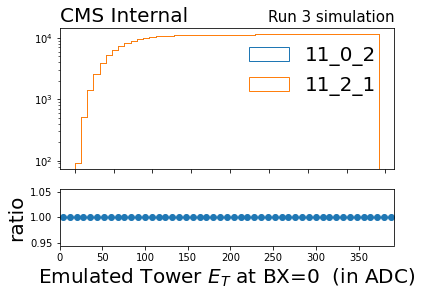

In [39]:
PlotOverlayWithRatio([tp_e1,tp_e2], labels_,"Cumm_EmulSum_EE_BX0_11_0_2_vs_11_2_1.pdf", 
                     bins=np.arange(0,400,8),
                     cuml=1)